# Decision Trees and Random Forests

dataset: kyphosis.csv

It represents a number of patients that had Kyphosis which is a spinal condition. They had an operation and the operation was a corrective spinal surgery. The dataset basically represents whether or not the Kyphosis condition was absent or present after the operation.

**Data information:**
* Kyphosis: if the Kyphosis condition was absent or present after the operation
* Age: the age of person in months
* Number: the number of vertebrae involved in the operation
* Start: the number of the first or top most vertebrae that was operated on

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load the dataset
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Exploratory Data Analysis

#### Check the info of the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


#### Make a pairplot with the data:

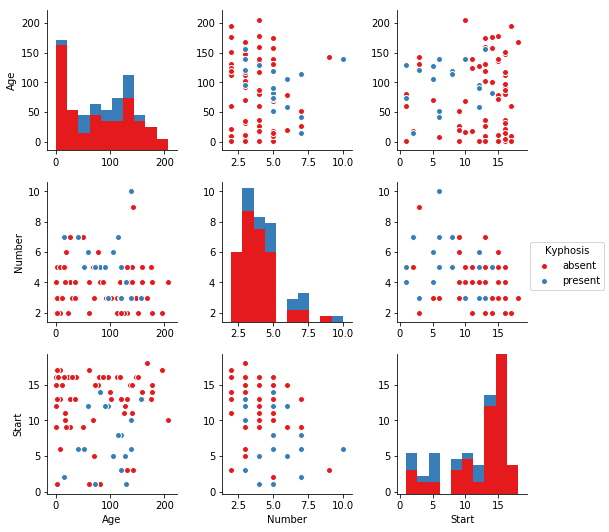

In [5]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

## Making the Machine Learning Modeling for Decision Trees

#### Splitting the data:

In [6]:
from sklearn.cross_validation import train_test_split

/Users/pantelistzamalis/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# the X data must be all the columns except the 'Kyphosis' column which is the labeled data 'y'
X = df.drop('Kyphosis', axis=1)

In [8]:
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Building the Decision Trees model:

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
# creating the DT object
dtree = DecisionTreeClassifier()

In [12]:
# fitting the data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Predictions and Evaluation:

In [13]:
# making predictions
predictions = dtree.predict(X_test)

In [14]:
# measuring accuracy
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))

Confusion matrix:
[[16  3]
 [ 4  2]]


In [16]:
print('Classification report:')
print(classification_report(y_test, predictions))

Classification report:
             precision    recall  f1-score   support

     absent       0.80      0.84      0.82        19
    present       0.40      0.33      0.36         6

avg / total       0.70      0.72      0.71        25



## Building the Random Forests model

The reason why random forest classifiers are under *ensemble* instead of *tree* is because they are a bunch of essentially decision trees and it's an ensemble of them with certain caveats, such as the splits being chosen randomly etc..

#### Building the Random Forests model:

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# building the RF object
rfc = RandomForestClassifier(n_estimators=200)

In [19]:
# fitting the data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predictions and Evaluation:

In [20]:
# making predictions
rfc_predictions = rfc.predict(X_test)

In [21]:
# measuring accuracy
print('Confusion matrix:')
print(confusion_matrix(y_test, rfc_predictions))
print('\n')
print('Classification report:')
print(classification_report(y_test, rfc_predictions))

Confusion matrix:
[[19  0]
 [ 5  1]]


Classification report:
             precision    recall  f1-score   support

     absent       0.79      1.00      0.88        19
    present       1.00      0.17      0.29         6

avg / total       0.84      0.80      0.74        25



In [22]:
rfc_predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

### Note: As the dataset becomes larger and larger, generally the Random Forests model will pretty much always do better than single Decision Trees.

## Decision Trees - Tree Visualization

Note 1: 'pip install pydot'
Note 2: import graph_viz library, which takes a graph object and it creates a picture of it 

check the Graphviz library here: https://www.graphviz.org/

In [23]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [24]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [25]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)

In [26]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

In [27]:
# run the following code line when the Graphviz library is installed to the computer
# code: Image(graph[0].create_png())

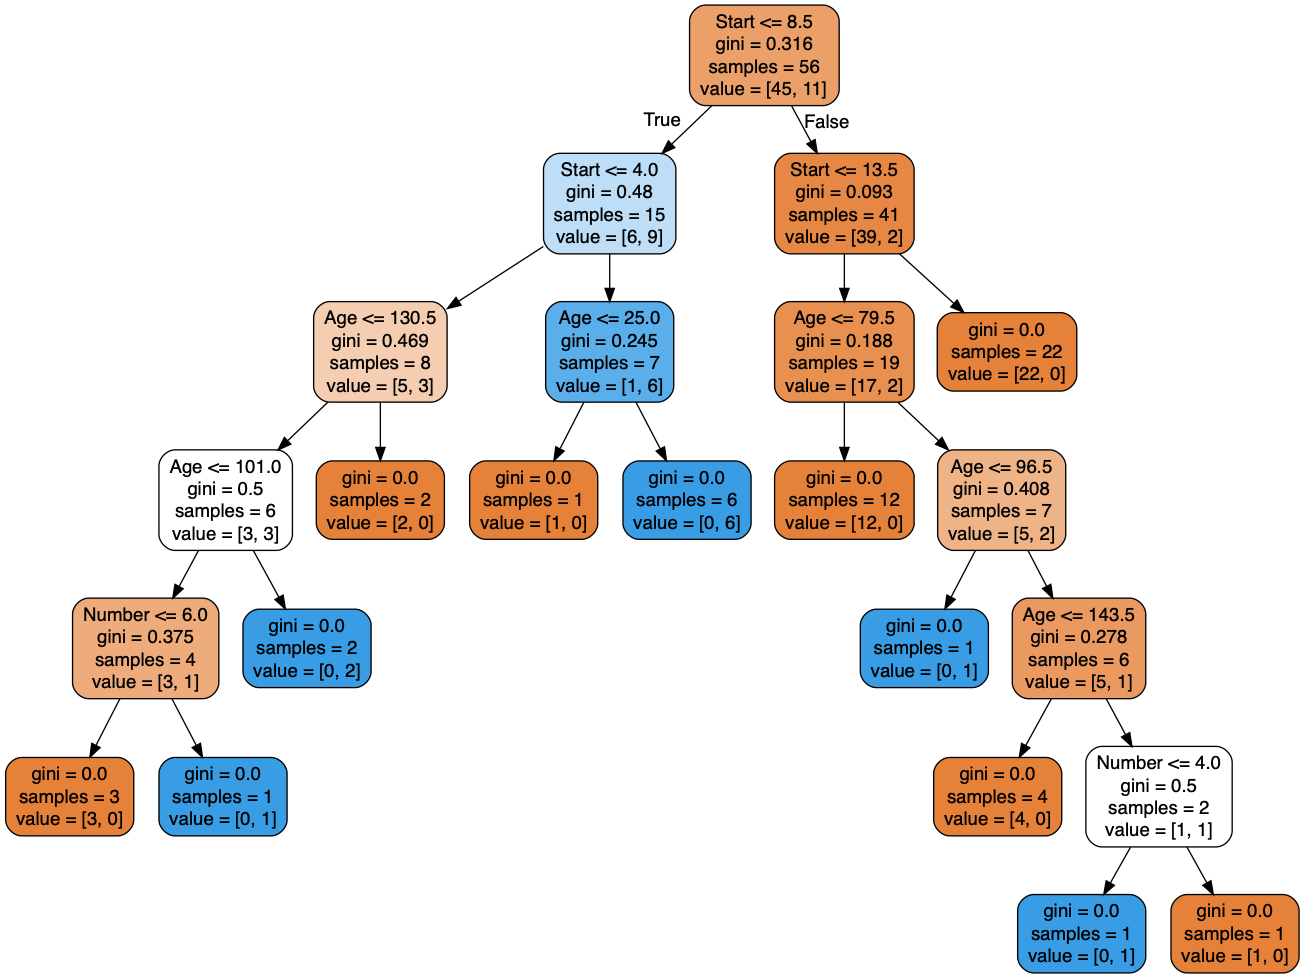

In [28]:
Image(graph[0].create_png())